In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle



In [45]:
# PCA function to reduce dimensionality
def pca(X, n_components):
    # Center the data by subtracting the mean of each feature
    X_centered = X - np.mean(X, axis=0)

    # Calculate the covariance matrix of the centered data
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvalues in descending order and get corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[sorted_indices]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]

    # Select the top 'n_components' eigenvectors
    eigenvectors_selected = eigenvectors_sorted[:, :n_components]

    # Project data onto the new lower-dimensional space
    X_pca = np.dot(X_centered, eigenvectors_selected)
    return X_pca, eigenvectors_selected


In [ ]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

class SupportVectorMachine:
    def __init__(self, learning_rate, num_iterations, regularization_strength):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization_strength = regularization_strength
        self.weights = None
        self.cost_history = []

    def compute_cost(self, X, Y):
        N = X.shape[0]
        margins = 1 - Y * (np.dot(X, self.weights))
        margins[margins < 0] = 0
        hinge_loss = np.sum(margins) / N
        cost = 0.5 * np.dot(self.weights, self.weights) + self.regularization_strength * hinge_loss
        return cost

    def calculate_cost_gradient(self, X_batch, Y_batch):
        N = X_batch.shape[0]
        margins = 1 - Y_batch * np.dot(X_batch, self.weights)
        dw = np.zeros_like(self.weights)

        for i in range(N):
            if margins[i] > 0:
                dw -= self.regularization_strength * Y_batch[i] * X_batch[i]

        dw /= N
        dw += self.weights
        return dw

    def fit(self, X, Y):
        self.weights = np.random.randn(X.shape[1]) * 0.01  # Initialize weights randomly
        for epoch in range(self.num_iterations):
            X, Y = shuffle(X, Y)  # Shuffle data
            for i in range(X.shape[0]):
                X_batch = X[i:i+1]
                Y_batch = Y[i:i+1]
                gradient = self.calculate_cost_gradient(X_batch, Y_batch)
                self.weights -= self.learning_rate * gradient
            
            cost = self.compute_cost(X, Y)
            self.cost_history.append(cost)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}/{self.num_iterations} - Cost: {cost}")

    def predict(self, X):
        predictions = np.sign(np.dot(X, self.weights))
        return predictions

    def init(self, X, y):
        print("Initializing SVM...")
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        self.fit(X_scaled, y)

#

In [47]:
# Logistic Regression class for binary classification
class LogisticRegressionModel:
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return np.column_stack((1 - y_pred, y_pred))

    def predict(self, X):
        y_pred_prob = self.predict_proba(X)[:, 1]
        return [1 if i > 0.5 else 0 for i in y_pred_prob]



In [48]:
# Specify the path to your Microsoft CSV file
file_path = r'C:\Users\pamar_1wl3que\Documents\blender task 2\titanic.csv'
# Read the CSV file
# Use appropriate encoding and delimiter if necessary
data = pd.read_csv(file_path, encoding='ISO-8859-1', sep=',')  # Adjust 'sep' if needed

# Preprocess the data
data['Age'].fillna(data['Age'].median(), inplace=True)
data.drop(columns=['Name','PassengerId','Ticket','Cabin'], inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Feature selection: drop irrelevant columns
X = data.drop(['Survived'], axis=1)
y = data['Survived'].values


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




C:\Users\pamar_1wl3que\AppData\Local\Temp\ipykernel_29816\3345285303.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\pamar_1wl3que\AppData\Local\Temp\ipykernel_29816\3345285303.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

Logistic Regression (without PCA) Results:
[[88 17]
 [22 52]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Accuracy: 0.7821229050279329


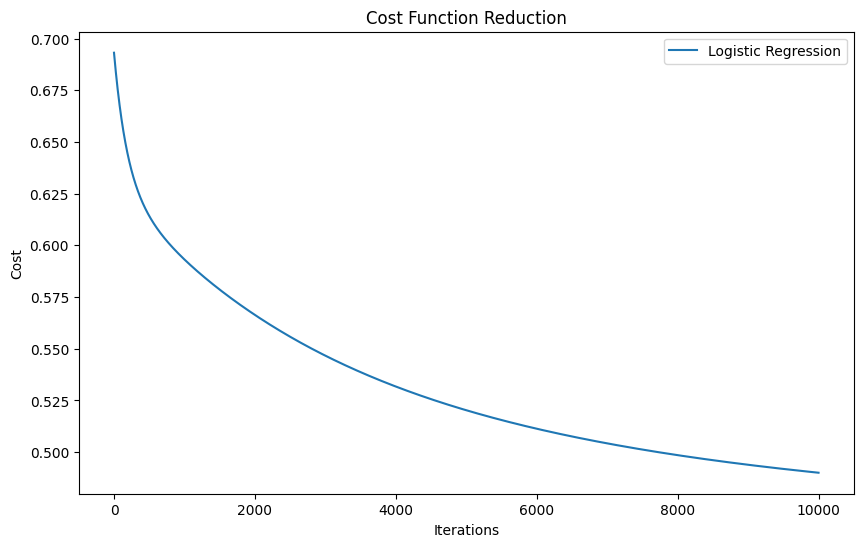

In [49]:
# Train Logistic Regression Model (without PCA)
logistic_regression = LogisticRegressionModel(learning_rate=0.004, num_iterations=10000)
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

# Evaluate Logistic Regression (without PCA)
print("Logistic Regression (without PCA) Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

# Plot cost function for Logistic Regression
plt.figure(figsize=(10, 6))
plt.plot(logistic_regression.loss_history, label='Logistic Regression')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Reduction')
plt.legend()
plt.show()



In [51]:
# Apply PCA to reduce dimensionality
X_train_pca, eigenvectors = pca(X_train, n_components=6)
X_test_pca = np.dot(X_test - np.mean(X_train, axis=0), eigenvectors)

# Train Logistic Regression Model (with PCA)
logistic_regression_pca = LogisticRegressionModel(learning_rate=0.004, num_iterations=50000)
logistic_regression_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = logistic_regression_pca.predict(X_test_pca)

# Evaluate Logistic Regression with PCA
print("Logistic Regression (with PCA) Results:")
print(confusion_matrix(y_test, y_pred_lr_pca))
print(classification_report(y_test, y_pred_lr_pca))
accuracy_lr_pca = accuracy_score(y_test, y_pred_lr_pca)
print("Accuracy:", accuracy_lr_pca)

# Train SVM Model (without PCA)
svm = SupportVectorMachine(learning_rate=0.00001, num_iterations=1000, regularization_strength=0.001)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate SVM (without PCA)
print("SVM (without PCA) Results:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

'''# Plot cost function for SVM
plt.figure(figsize=(10, 6))
plt.plot(svm.cost_history, label='SVM')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Reduction')
plt.legend()
plt.show()'''

# Train SVM Model (with PCA)
svm_pca = SupportVectorMachine(learning_rate=0.00001, num_iterations=1000, regularization_strength=0.001)
svm_pca.init(X_train_pca, y_train)
y_pred_svm_pca = svm_pca.predict(X_test_pca)

# Evaluate SVM with PCA
print("SVM (with PCA) Results:")
print(confusion_matrix(y_test, y_pred_svm_pca))
print(classification_report(y_test, y_pred_svm_pca))
accuracy_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
print("Accuracy:", accuracy_svm_pca)

Logistic Regression (with PCA) Results:
[[86 19]
 [19 55]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Accuracy: 0.7877094972067039
Epoch 0/1000 - Cost: 0.0012818849166047117
Epoch 100/1000 - Cost: 0.0010678125000546071
Epoch 200/1000 - Cost: 0.0010162751274947579
Epoch 300/1000 - Cost: 0.0010038676419723577
Epoch 400/1000 - Cost: 0.0010008805732531502
Epoch 500/1000 - Cost: 0.0010001614438034457
Epoch 600/1000 - Cost: 0.0009999883153902077
Epoch 700/1000 - Cost: 0.0009999466352314914
Epoch 800/1000 - Cost: 0.0009999366008440695
Epoch 900/1000 - Cost: 0.0009999341849280027
SVM (without PCA) Results:
[[  0 105]
 [  0  74]]
              precision    recall  f1-score   support

           0       0.00      0.0

c:\Users\pamar_1wl3que\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pamar_1wl3que\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pamar_1wl3que\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Epoch 100/1000 - Cost: 0.0010499000192440377
Epoch 200/1000 - Cost: 0.0010119791942628643
Epoch 300/1000 - Cost: 0.0010028498498737641
Epoch 400/1000 - Cost: 0.0010006519900560016
Epoch 500/1000 - Cost: 0.0010001228606570304
Epoch 600/1000 - Cost: 0.0009999954742256165
Epoch 700/1000 - Cost: 0.0009999648059191837
Epoch 800/1000 - Cost: 0.0009999574231990827
Epoch 900/1000 - Cost: 0.0009999556456787599
SVM (with PCA) Results:
[[ 0  0  0]
 [79  0 26]
 [16  0 58]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00       105
         1.0       0.69      0.78      0.73        74

    accuracy                           0.32       179
   macro avg       0.23      0.26      0.24       179
weighted avg       0.29      0.32      0.30       179

Accuracy: 0.3240223463687151


c:\Users\pamar_1wl3que\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pamar_1wl3que\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pamar_1wl3que\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn